In [1]:
# !pip install torch
# !pip install pillow
# !pip install torchvision
# !pip install function
import pandas as pd
from ST import style_transfer
# !wget https://isic-challenge-data.s3.amazonaws.com/2024/ISIC_2024_Training_Input.zip
# !unzip ISIC_2024_Training_Input.zip

In [3]:

real_malignant_data_df = pd.read_excel(
    'all_malignant_skin_tone_classification_type_of_cancer.xlsx',
    sheet_name='Sheet1',  # Specify the sheet name
    na_values=['NA', 'N/A', ''],  # Treat these values as missing
)

# Display the first 5 rows of the DataFrame
print("real",len(real_malignant_data_df))
all_train_df= pd.read_csv('train_dataset_with_skin_tone.csv')
print(all_train_df.head())
all_labeled_data = all_train_df.merge(real_malignant_data_df[['isic_id', 'iddx_3']], on='isic_id', how='left')
print("L",all_labeled_data.head())
all_labeled_data ['type'] = all_labeled_data['iddx_3_y'].fillna('benign')

# Drop the temporary 'idx_3' column
all_labeled_data .drop(columns=['iddx_3_y'], inplace=True)

# Display the updated DataFrame
print(len(all_labeled_data[all_labeled_data['type'] == 'benign']), len(all_labeled_data[all_labeled_data['target'] ==0]))

columns_to_keep = ['isic_id', 'target', 'type', 'skin_tone']

# Drop all columns except the ones in columns_to_keep
columns_to_drop = [col for col in all_labeled_data.columns if col not in columns_to_keep]
all_labeled_data = all_labeled_data.drop(columns=columns_to_drop)

# Save the updated DataFrame to a new CSV file
all_labeled_data.to_csv('train_labeled.csv', index=False)


real 393
        isic_id  target iddx_3 iddx_4 iddx_5 mel_mitotic_index  mel_thick_mm  \
0  ISIC_3283637       0    NaN    NaN    NaN               NaN           NaN   
1  ISIC_5518492       0    NaN    NaN    NaN               NaN           NaN   
2  ISIC_1821584       0    NaN    NaN    NaN               NaN           NaN   
3  ISIC_8102613       0    NaN    NaN    NaN               NaN           NaN   
4  ISIC_6194285       0    NaN    NaN    NaN               NaN           NaN   

   tbp_lv_dnn_lesion_confidence  Unnamed: 8  Unnamed: 9 skin_tone  
0                    100.000000         NaN         NaN   #BEA07E  
1                     99.976510         NaN         NaN   #9D7A54  
2                    100.000000         NaN         NaN   #BEA07E  
3                     53.199730         NaN         NaN   #6F503C  
4                     99.936348         NaN         NaN   #9D7A54  


/var/folders/jf/86wt6y815q55gbm9d3z6pmpm0000gn/T/ipykernel_26306/2348818565.py:9: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  all_train_df= pd.read_csv('train_dataset_with_skin_tone.csv')


L         isic_id  target iddx_3_x iddx_4 iddx_5 mel_mitotic_index  \
0  ISIC_3283637       0      NaN    NaN    NaN               NaN   
1  ISIC_5518492       0      NaN    NaN    NaN               NaN   
2  ISIC_1821584       0      NaN    NaN    NaN               NaN   
3  ISIC_8102613       0      NaN    NaN    NaN               NaN   
4  ISIC_6194285       0      NaN    NaN    NaN               NaN   

   mel_thick_mm  tbp_lv_dnn_lesion_confidence  Unnamed: 8  Unnamed: 9  \
0           NaN                    100.000000         NaN         NaN   
1           NaN                     99.976510         NaN         NaN   
2           NaN                    100.000000         NaN         NaN   
3           NaN                     53.199730         NaN         NaN   
4           NaN                     99.936348         NaN         NaN   

  skin_tone iddx_3_y  
0   #BEA07E      NaN  
1   #9D7A54      NaN  
2   #BEA07E      NaN  
3   #6F503C      NaN  
4   #9D7A54      NaN  
320533 32053

In [8]:
import pandas as pd
from ST import style_transfer
all_labeled_data= pd.read_csv('train_labeled.csv')
benign_data = all_labeled_data[all_labeled_data['target'] == 0]
cancer_data = all_labeled_data[all_labeled_data['target'] == 1]
benign_data_sample = benign_data.sample(n=600, random_state=42)
print(len(cancer_data))
data_to_aug =  pd.concat([benign_data_sample, cancer_data], axis=0, ignore_index=True)

314


In [9]:
import cv2

def remove_black_bars(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to identify black regions
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    # Find contours of the non-black regions
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the bounding box of the largest contour
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Crop the image to the bounding box
        cropped_image = image[y:y+h, x:x+w]

        # Save the cropped image
        cv2.imwrite(output_path, cropped_image)
        print(f"Black bars removed. Cropped image saved to {output_path}")
    else:
        print("No black bars detected.")

# Example usage
remove_black_bars("ISIC_2024_Training_Input/ISIC_3406936.jpg", "output_image.jpg")

Black bars removed. Cropped image saved to output_image.jpg


In [10]:
for index, row in data_to_aug.iterrows():
    input_path = f"ISIC_2024_Training_Input/{row['isic_id']}.jpg"
    output_path = f"NO_BB/{row['isic_id']}.jpg"
    remove_black_bars(input_path, output_path)

Black bars removed. Cropped image saved to NO_BB/ISIC_8343722.jpg
Black bars removed. Cropped image saved to NO_BB/ISIC_0221819.jpg
Black bars removed. Cropped image saved to NO_BB/ISIC_5012722.jpg
Black bars removed. Cropped image saved to NO_BB/ISIC_6588022.jpg
Black bars removed. Cropped image saved to NO_BB/ISIC_0701271.jpg
Black bars removed. Cropped image saved to NO_BB/ISIC_9945551.jpg
Black bars removed. Cropped image saved to NO_BB/ISIC_8404878.jpg
Black bars removed. Cropped image saved to NO_BB/ISIC_2674899.jpg
Black bars removed. Cropped image saved to NO_BB/ISIC_2599042.jpg
Black bars removed. Cropped image saved to NO_BB/ISIC_4495931.jpg
Black bars removed. Cropped image saved to NO_BB/ISIC_3948257.jpg
Black bars removed. Cropped image saved to NO_BB/ISIC_1395658.jpg
Black bars removed. Cropped image saved to NO_BB/ISIC_2561379.jpg
Black bars removed. Cropped image saved to NO_BB/ISIC_5442819.jpg
Black bars removed. Cropped image saved to NO_BB/ISIC_7216997.jpg
Black bars

In [11]:
s1 = cancer_data.iloc[0]['isic_id']
s2 = cancer_data.iloc[1]['isic_id']

style_transfer("ISIC_2024_Training_Input/" + s1 + ".jpg","ISIC_2024_Training_Input/"+ s2 + ".jpg","new_test")

ISIC_2024_Training_Input/ISIC_9207822.jpg
<class 'int'>
(tensor([[[[0.5849, 0.5828, 0.5753,  ..., 0.6353, 0.6357, 0.6358],
          [0.5846, 0.5820, 0.5728,  ..., 0.6356, 0.6361, 0.6362],
          [0.5848, 0.5820, 0.5724,  ..., 0.6359, 0.6361, 0.6362],
          ...,
          [0.6648, 0.6655, 0.6665,  ..., 0.6549, 0.6546, 0.6549],
          [0.6628, 0.6629, 0.6647,  ..., 0.6534, 0.6533, 0.6535],
          [0.6623, 0.6627, 0.6640,  ..., 0.6528, 0.6529, 0.6530]],

         [[0.3877, 0.3857, 0.3767,  ..., 0.3886, 0.3890, 0.3890],
          [0.3873, 0.3846, 0.3751,  ..., 0.3889, 0.3895, 0.3894],
          [0.3876, 0.3855, 0.3748,  ..., 0.3897, 0.3900, 0.3901],
          ...,
          [0.4459, 0.4464, 0.4475,  ..., 0.3823, 0.3820, 0.3821],
          [0.4451, 0.4454, 0.4466,  ..., 0.3813, 0.3812, 0.3813],
          [0.4447, 0.4448, 0.4459,  ..., 0.3805, 0.3803, 0.3805]],

         [[0.3020, 0.2969, 0.2901,  ..., 0.2827, 0.2827, 0.2825],
          [0.3013, 0.2963, 0.2882,  ..., 0.2831, 0.

In [5]:
import itertools
cancer_sample = cancer_data.sample(10)
stylized_data = pd.DataFrame(columns=['isic_id', 'skin_tone', 'type', 'target'])
for (idx1, row1), (idx2, row2) in itertools.combinations(cancer_sample.iterrows(), 2):
    if row1['type'] == row2['type'] and row1['skin_tone'] != row2['skin_tone']:
        s1 = row1['isic_id']
        s2 = row2['isic_id']
        if (s1 != s2):
            # Apply style transfer for both (s1, s2) and (s2, s1)
            style_transfer(f"ISIC_2024_Training_Input/{s1}.jpg", 
                        f"ISIC_2024_Training_Input/{s2}.jpg", 
                        f"new_tests")

            style_transfer(f"ISIC_2024_Training_Input/{s2}.jpg", 
                        f"ISIC_2024_Training_Input/{s1}.jpg", 
                        f"new_tests")
                        # Apply style transfer for both (s1, s2) and (s2, s1)
            stylized_id_1 = f"{s1}_stylized_{s2}"
            stylized_id_2 = f"{s2}_stylized_{s1}"

            new_row_1 = {
                'isic_id': stylized_id_1,
                'skin_tone': row2['skin_tone'],
                'type': row1['type'],
                'target': row1['target']
            }
            
            new_row_2 = {
                'isic_id': stylized_id_2,
                'skin_tone': row1['skin_tone'],
                'type': row2['type'],
                'target': row2['target']
            }
            
            # Convert dictionaries to DataFrames
            new_df_1 = pd.DataFrame([new_row_1])
            new_df_2 = pd.DataFrame([new_row_2])
            stylized_data = pd.concat([stylized_data, new_df_1, new_df_2], ignore_index=True)

ISIC_2024_Training_Input/ISIC_6334282.jpg
<class 'int'>
(tensor([[[[0.4613, 0.4611, 0.4620,  ..., 0.4753, 0.4756, 0.4755],
          [0.4613, 0.4611, 0.4621,  ..., 0.4751, 0.4756, 0.4754],
          [0.4615, 0.4615, 0.4622,  ..., 0.4740, 0.4744, 0.4741],
          ...,
          [0.3355, 0.3355, 0.3355,  ..., 0.3355, 0.3355, 0.3355],
          [0.3355, 0.3355, 0.3355,  ..., 0.3355, 0.3355, 0.3355],
          [0.3355, 0.3355, 0.3355,  ..., 0.3355, 0.3355, 0.3355]],

         [[0.3322, 0.3324, 0.3328,  ..., 0.3383, 0.3385, 0.3386],
          [0.3322, 0.3323, 0.3328,  ..., 0.3380, 0.3384, 0.3384],
          [0.3326, 0.3328, 0.3330,  ..., 0.3372, 0.3375, 0.3375],
          ...,
          [0.2094, 0.2094, 0.2094,  ..., 0.2094, 0.2094, 0.2094],
          [0.2094, 0.2094, 0.2094,  ..., 0.2094, 0.2094, 0.2094],
          [0.2094, 0.2094, 0.2094,  ..., 0.2094, 0.2094, 0.2094]],

         [[0.2936, 0.2936, 0.2942,  ..., 0.3105, 0.3106, 0.3105],
          [0.2937, 0.2937, 0.2943,  ..., 0.3101, 0.

In [6]:
cancer_sample

,isic_id,target,skin_tone,type
38290,ISIC_6334282,1,#9D7A54,Basal cell carcinoma
76951,ISIC_1071408,1,#81654F,Basal cell carcinoma
313576,ISIC_1262710,1,#9D7A54,"Squamous cell carcinoma, Invasive"
157177,ISIC_4023678,1,#BEA07E,Melanoma Invasive
254067,ISIC_6382027,1,#E5C8A6,Squamous cell carcinoma in situ
211564,ISIC_2263885,1,#E7C1B8,"Melanoma, NOS"
43663,ISIC_1034966,1,#81654F,Basal cell carcinoma
221298,ISIC_0814829,1,#BEA07E,Basal cell carcinoma
148050,ISIC_1935982,1,#BEA07E,Basal cell carcinoma
71268,ISIC_6798316,1,#BEA07E,Melanoma Invasive


In [7]:
stylized_data

,isic_id,skin_tone,type,target
0,ISIC_6334282_stylized_ISIC_1071408,#81654F,Basal cell carcinoma,1
1,ISIC_1071408_stylized_ISIC_6334282,#9D7A54,Basal cell carcinoma,1
2,ISIC_6334282_stylized_ISIC_1034966,#81654F,Basal cell carcinoma,1
3,ISIC_1034966_stylized_ISIC_6334282,#9D7A54,Basal cell carcinoma,1
4,ISIC_6334282_stylized_ISIC_0814829,#BEA07E,Basal cell carcinoma,1
5,ISIC_0814829_stylized_ISIC_6334282,#9D7A54,Basal cell carcinoma,1
6,ISIC_6334282_stylized_ISIC_1935982,#BEA07E,Basal cell carcinoma,1
7,ISIC_1935982_stylized_ISIC_6334282,#9D7A54,Basal cell carcinoma,1
8,ISIC_1071408_stylized_ISIC_0814829,#BEA07E,Basal cell carcinoma,1
9,ISIC_0814829_stylized_ISIC_1071408,#81654F,Basal cell carcinoma,1


In [5]:
all_augmented = pd.read_csv('augmented_data.csv')
print(all_augmented.head())
bad_styles = ["3255283","3963068","0096034","0338720","1164461"
,"1377023"
,"0521019"
,"5773992"
,"2364514"
,"4591437"
,"5439879"
,'6016458','3450877']

                              isic_id skin_tone    type  target
0  ISIC_9945551_stylized_ISIC_8438686   #BEA07E  benign       0
1  ISIC_8438686_stylized_ISIC_9945551   #9D7A54  benign       0
2  ISIC_9945551_stylized_ISIC_5648971   #BEA07E  benign       0
3  ISIC_5648971_stylized_ISIC_9945551   #9D7A54  benign       0
4  ISIC_2360922_stylized_ISIC_6447842   #81654F  benign       0


In [6]:
import os
bad_rows = all_augmented[all_augmented['isic_id'].str.extract(r'stylized_ISIC_(\d+)')[0].isin(bad_styles)]

# Remove rows with bad styles from the DataFrame
all_augmented = all_augmented.drop(bad_rows.index)

# Save the updated DataFrame to a new CSV file (optional)
all_augmented.to_csv('cleaned_augmented_data.csv', index=False)

# Directory containing the images
image_directory = 'cancer_sampled_augmented_data_archive (1)'

# Iterate over the bad rows and delete corresponding images
for isic_id in bad_rows['isic_id']:
    image_path = os.path.join(image_directory, f"{isic_id}.jpg")
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Deleted: {image_path}")
    else:
        print(f"File not found: {image_path}")

Deleted: cancer_sampled_augmented_data_archive (1)/ISIC_0445144_stylized_ISIC_0338720.jpg
Deleted: cancer_sampled_augmented_data_archive (1)/ISIC_3813551_stylized_ISIC_1164461.jpg
Deleted: cancer_sampled_augmented_data_archive (1)/ISIC_7351975_stylized_ISIC_5439879.jpg
Deleted: cancer_sampled_augmented_data_archive (1)/ISIC_2718951_stylized_ISIC_5773992.jpg
Deleted: cancer_sampled_augmented_data_archive (1)/ISIC_2593905_stylized_ISIC_5773992.jpg
Deleted: cancer_sampled_augmented_data_archive (1)/ISIC_0381510_stylized_ISIC_5773992.jpg
Deleted: cancer_sampled_augmented_data_archive (1)/ISIC_0704481_stylized_ISIC_0096034.jpg
Deleted: cancer_sampled_augmented_data_archive (1)/ISIC_1967232_stylized_ISIC_5439879.jpg
Deleted: cancer_sampled_augmented_data_archive (1)/ISIC_7993830_stylized_ISIC_5439879.jpg
Deleted: cancer_sampled_augmented_data_archive (1)/ISIC_2943219_stylized_ISIC_1377023.jpg
Deleted: cancer_sampled_augmented_data_archive (1)/ISIC_8731383_stylized_ISIC_0096034.jpg
Deleted: c

In [8]:
target_counts = all_augmented['target'].value_counts()

# Calculate the ratio of target = 0 to target = 1
ratio = target_counts.get(0, 0) / target_counts.get(1, 1)

print(f"Ratio of target=0 to target=1: {ratio:.2f}")

Ratio of target=0 to target=1: 2.03


In [ ]:
import pandas as pd
all_augmented = pd.read_csv('cleaned_styled_data/cleaned_augmented_data.csv')
print(all_augmented.head())
all_augmented[all_augmented['skin_tone']=='#373028']


                              isic_id skin_tone    type  target
0  ISIC_9945551_stylized_ISIC_8438686   #BEA07E  benign       0
1  ISIC_8438686_stylized_ISIC_9945551   #9D7A54  benign       0
2  ISIC_9945551_stylized_ISIC_5648971   #BEA07E  benign       0
3  ISIC_5648971_stylized_ISIC_9945551   #9D7A54  benign       0
4  ISIC_2360922_stylized_ISIC_6447842   #81654F  benign       0
ERROR: Could not find a version that satisfies the requirement mpatches (from versions: none)
ERROR: No matching distribution found for mpatches


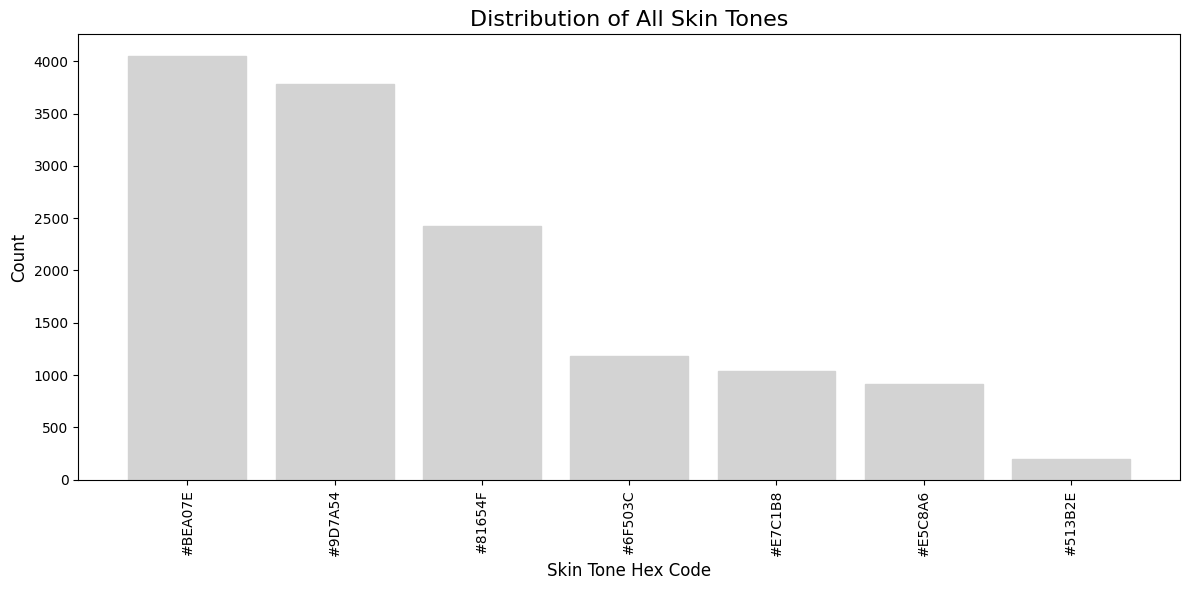

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Get counts of all skin tones
skin_tone_counts = all_augmented['skin_tone'].value_counts().reset_index()
skin_tone_counts.columns = ['skin_tone', 'count']

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(skin_tone_counts['skin_tone'], skin_tone_counts['count'])

# Highlight the specific skin tone
for i, bar in enumerate(bars):
    if skin_tone_counts['skin_tone'][i] == '#373028':
        bar.set_color('#373028')
        bar.set_edgecolor('black')
        bar.set_linewidth(2)
    else:
        bar.set_color('lightgray')

# Customizations
plt.title('Distribution of All Skin Tones', fontsize=16)
plt.xlabel('Skin Tone Hex Code', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)



plt.tight_layout()
plt.show()

In [14]:
# Calculate percentage distribution
skin_tone_percent = all_augmented['skin_tone'].value_counts(normalize=True) * 100

# Convert to DataFrame for better display
percent_df = skin_tone_percent.reset_index()
percent_df.columns = ['Skin Tone', 'Percentage']
percent_df['Percentage'] = percent_df['Percentage'].round(2)  # Round to 2 decimal places

# Sort by percentage (descending)
percent_df = percent_df.sort_values('Percentage', ascending=False)

# Print the table
print("Percentage Distribution of Skin Tones:")
print(percent_df.to_string(index=False))


Percentage Distribution of Skin Tones:
Skin Tone  Percentage
  #BEA07E       29.82
  #9D7A54       27.84
  #81654F       17.80
  #6F503C        8.72
  #E7C1B8        7.62
  #E5C8A6        6.74
  #513B2E        1.46
